# EDA 1- Bike Details Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.read_csv('BIKE DETAILS.csv')

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [4]:
df=pd.read_csv('BIKE DETAILS.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


**Q1. What is the range of selling prices in the dataset ?**

In [6]:
min = df['selling_price'].min()
max= df['selling_price'].max()

print(f'The range of selling prices in the dataset is {min} to {max} ')

The range of selling prices in the dataset is 5000 to 760000 


**Q2.What is the median selling price for bikes in the dataset ?**

In [7]:
df['selling_price'].median()

45000.0

**Q3.What is the most common seller type ?**

In [8]:
df['seller_type'].value_counts().idxmax() # hence 'Individual' is the most common seller type.

'Individual'

**Q4. How many bikes have driven more than 50,000 kilometers ?**

In [9]:
count = (df['km_driven'] > 50000).sum()
print(f"Number of bikes driven more than 50,000 kilometers: {count}")

Number of bikes driven more than 50,000 kilometers: 170


**Q5. What is the average km_driven value for each ownership type ?**

In [10]:
df['km_driven'].groupby(df['owner']).mean()

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


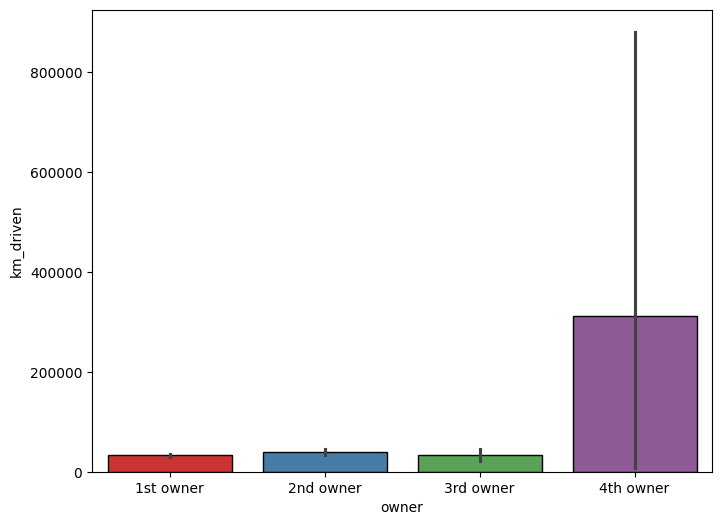

In [11]:
# Bar plot showing the aerage km_driven for each owner.

plt.figure(figsize=(8,6))
sns.barplot(x=df['owner'],y=df['km_driven'],palette='Set1',edgecolor='black')
plt.show()


**Q6.What proportion of bikes are from the year 2015 or older ?**

In [12]:
proportion_2015_or_older = np.mean(df['year'] <= 2015)
print(f"Proportion of bikes from 2015 or older: {proportion_2015_or_older}")

Proportion of bikes from 2015 or older: 0.5664467483506126


**Q7.What is the trend of missing values across the dataset ?**


In [13]:
missing_values=df.isnull().sum()

In [14]:
missing_values

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


**Q8.What is the highest ex_showroom_price recorded, and for which bike ?**

In [15]:
Highest_ex_showroom_price= df['ex_showroom_price'].max()
print(f"The highest ex_showroom_price recorded is {Highest_ex_showroom_price}")

The highest ex_showroom_price recorded is 1278000.0


**Q9.What is the total number of bikes listed by each seller type ?**

In [16]:
df['seller_type'].value_counts()

,count
seller_type,
Individual,1055
Dealer,6


**Q10.What is the relationship between selling_price and km_driven for first-owner bikes ?**

In [17]:
df[df['owner'] == '1st owner']['owner'].value_counts()

,count
owner,
1st owner,924


In [18]:
first_owner = df[df['owner'] == '1st owner']['owner'].value_counts()

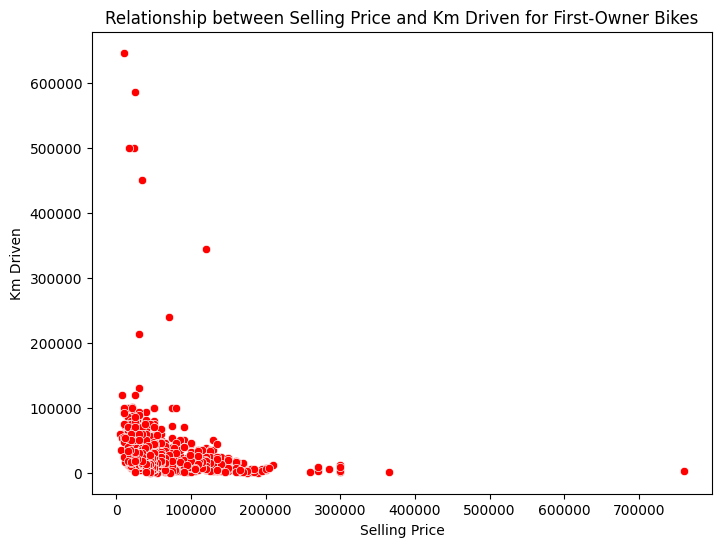

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='selling_price',y='km_driven',data=df[df['owner']=='1st owner'],color='red')
plt.xlabel('Selling Price')
plt.ylabel('Km Driven')
plt.title('Relationship between Selling Price and Km Driven for First-Owner Bikes')
plt.show()


**Q11. Identify and remove outliers in the km_driven column using the IQR method ?**

In [20]:
Q1=df['km_driven'].quantile(0.25)
Q3=df['km_driven'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

df_no_outliers=df[(df['km_driven']>=lower_bound) & (df['km_driven']<=upper_bound)]

print(f"Number of outliers removed: {len(df)-len(df_no_outliers)}")

Number of outliers removed: 39


**Q12.Perform a bivariate analysis to visualize the relationship between year and selling_price ?**

In [21]:
correlation = df['year'].corr(df['selling_price'])
print(f"The correlation between year and selling_price is: {correlation}")

The correlation between year and selling_price is: 0.40218840061474403


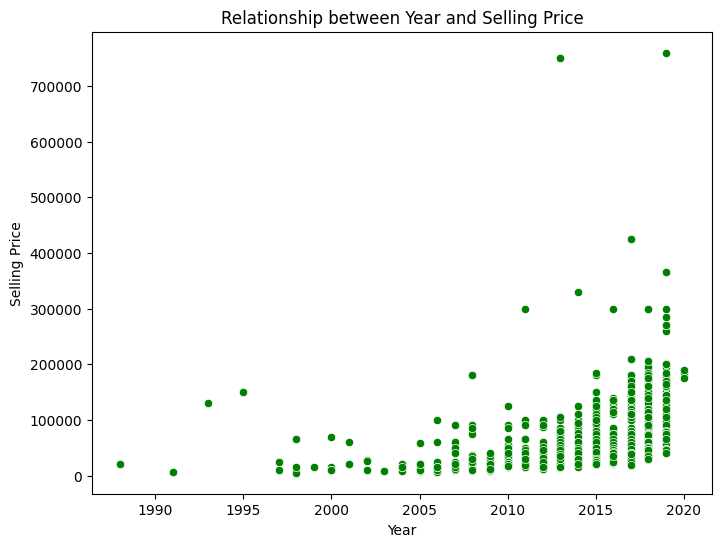

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='year', y='selling_price', data=df,color='green')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.title('Relationship between Year and Selling Price')
plt.show()


**Q13.What is the average depreciation in selling price based on the bike's age (current year - manufacturing
year)?**

In [23]:
# Calculate the age of each bike
df['bike_age'] = 2023 - df['year']


average_selling_price_by_age = df.groupby('bike_age')['selling_price'].mean()

depreciation_by_age = average_selling_price_by_age.diff()
print(depreciation_by_age)


bike_age
3               NaN
4     -63643.821705
5     -32029.137582
6      -8765.637204
7     -20425.718151
8      -1969.018692
9      -7831.868132
10      2468.854433
11    -15388.586301
12       -92.678689
13     -3862.387978
14     -9525.476190
15     12021.428571
16     -9361.699507
17     -1547.586207
18     -6401.428571
19     -1878.571429
20     -7100.000000
21     12666.666667
22     19333.333333
23    -19166.666667
24     -5833.333333
25     13333.333333
26    -10833.333333
28    132500.000000
30    -20000.000000
32   -124000.000000
35     14000.000000
Name: selling_price, dtype: float64


**Q14.Which bike names are priced significantly above the average price for their manufacturing year ?**

In [24]:
average_price_by_year = df.groupby('year')['selling_price'].mean()

df['average_price_for_year'] = df['year'].map(average_price_by_year)

price_std = df['selling_price'].std()
df['price_diff'] = df['selling_price'] - df['average_price_for_year']
significantly_above_average = df[df['price_diff'] > 2 * price_std]

print(significantly_above_average['name'])

7      Royal Enfield Bullet 350 [2007-2011]
13                            Yamaha YZF R3
130        Royal Enfield Continental GT 650
134              Harley-Davidson Street Bob
242                              KTM RC 390
261           Royal Enfield Interceptor 650
288                              KTM RC 390
289          Kawasaki Ninja 650 [2018-2019]
295                         Suzuki GSX S750
311              Harley-Davidson Street 750
315           Royal Enfield Interceptor 650
344                              BMW G310GS
407           Royal Enfield Interceptor 650
411            KTM 390 Duke ABS [2013-2016]
860          Kawasaki Ninja 650 [2018-2019]
890            Royal Enfield Classic Chrome
892                            KTM 390 Duke
897                      Kawasaki Ninja 300
Name: name, dtype: object


**Q15.Develop a correlation matrix for numeric columns and visualize it using a heatmap ?**

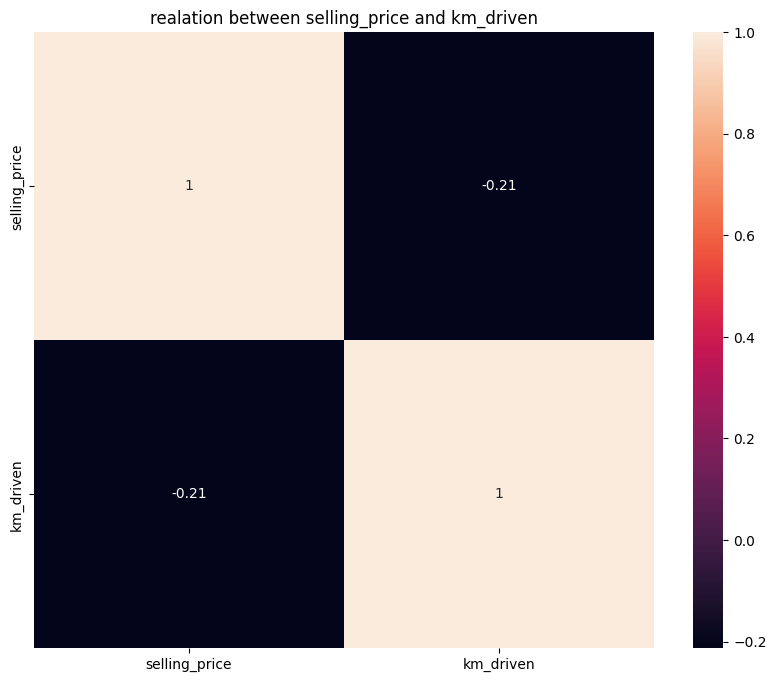

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(df[['selling_price','km_driven']].corr(),annot=True)
plt.title('realation between selling_price and km_driven')
plt.show()


# EDA 2- Car Sales Dataset

In [26]:
pd.read_csv('Car Sale.csv')

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


In [27]:
df2=pd.read_csv('Car Sale.csv')

**Q1.What is the average selling price of cars for each dealer, and how does it compare across different dealers ?**

In [28]:
df2['Price ($)'].groupby(df2['Dealer_Name']).mean()

,Price ($)
Dealer_Name,
Buddy Storbeck's Diesel Service Inc,27217.261563
C & M Motors Inc,28111.755200
Capitol KIA,28189.703822
Chrysler Plymouth,27555.526400
Chrysler of Tri-Cities,28123.091054
Classic Chevy,28602.014446
Clay Johnson Auto Sales,27816.027113
Diehl Motor CO Inc,27993.929487
Enterprise Rent A Car,28312.580800


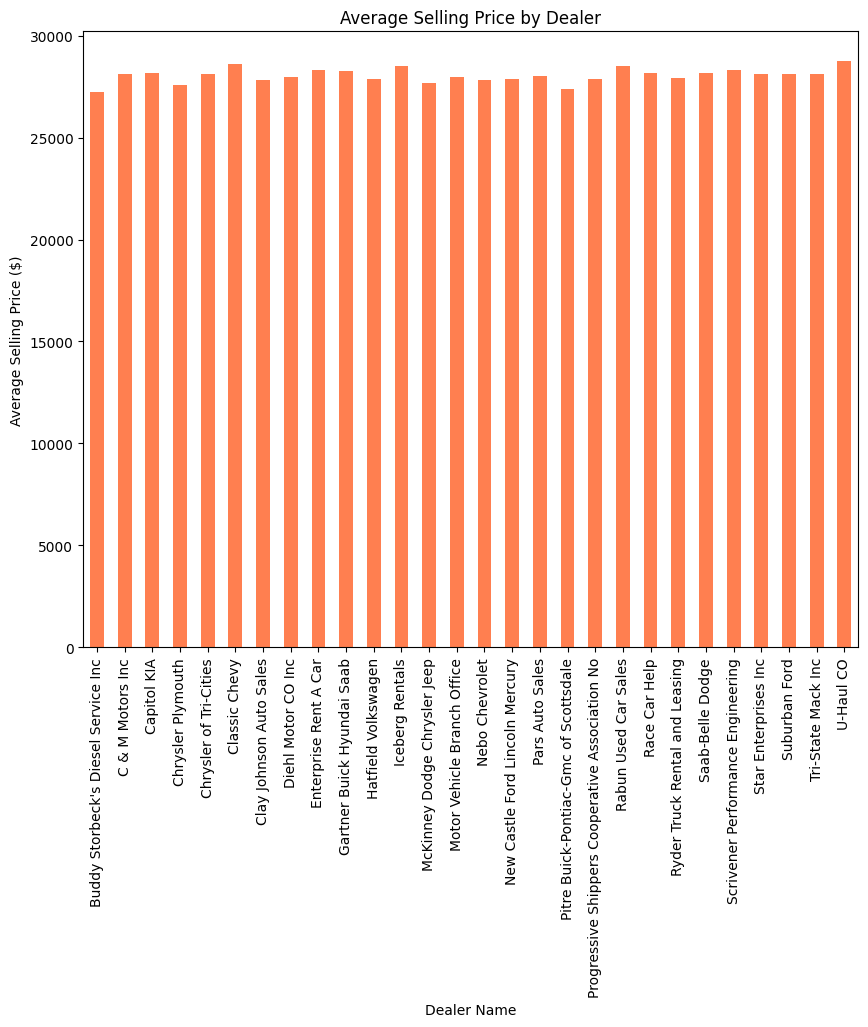

In [29]:
average_price_by_dealer=df2['Price ($)'].groupby(df2['Dealer_Name']).mean()


plt.figure(figsize=(10,8))
average_price_by_dealer.plot(kind='bar',color='coral')
plt.xlabel('Dealer Name')
plt.ylabel('Average Selling Price ($)')
plt.title('Average Selling Price by Dealer')
plt.show()

**Q2.Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing
trends ?**

In [30]:
highest_variation_brand=df2.groupby('Company')['Price ($)'].std()

highest_with_variation_brand= highest_variation_brand.idxmax()
highest_variation_value= highest_variation_brand.max()

print(f"The car brand with the highest price variation is {highest_variation_brand} with a standard deviation of {highest_variation_value}")

The car brand with the highest price variation is Company
Acura          8183.046414
Audi          12904.243867
BMW           15065.578723
Buick         17142.232626
Cadillac      19517.120220
Chevrolet     13311.063223
Chrysler      11583.286811
Dodge         11187.592085
Ford          15849.090227
Honda         11148.629062
Hyundai        3485.982649
Infiniti      13696.332844
Jaguar        10222.531533
Jeep           9459.834418
Lexus         17852.923492
Lincoln       19658.050211
Mercedes-B    15722.807459
Mercury       16445.172195
Mitsubishi    11671.343035
Nissan        16214.264017
Oldsmobile    15711.345857
Plymouth      19065.997338
Pontiac       14348.963592
Porsche        5261.839206
Saab          19653.740089
Saturn        15990.223671
Subaru        12920.771620
Toyota        15367.131714
Volkswagen    12527.124011
Volvo         12933.790185
Name: Price ($), dtype: float64 with a standard deviation of 19658.050211265567


**Q3.What is the distribution of car prices for each transmission type, and how do the interquartile ranges
compare ?**

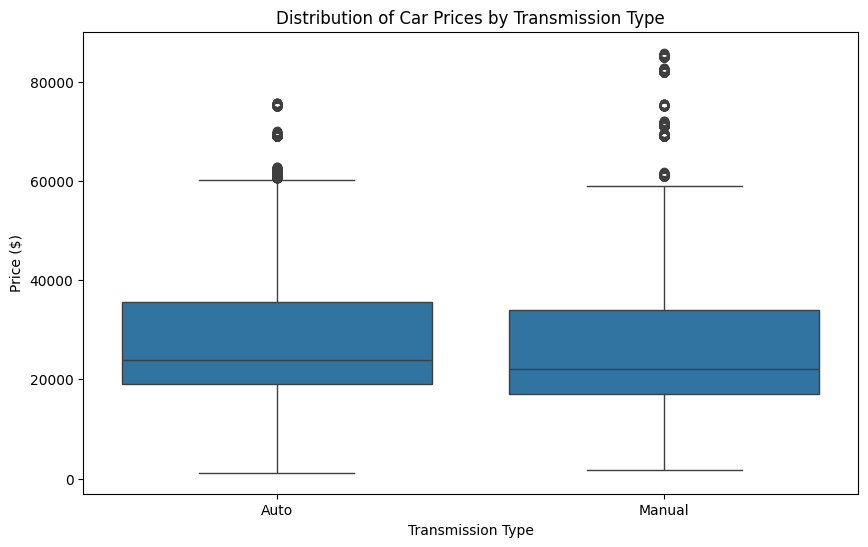


Interquartile Range (IQR) of Car Prices by Transmission Type:


,Price ($)
Transmission,
Auto,16500.0
Manual,17000.0


In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Price ($)', data=df2)
plt.xlabel('Transmission Type')
plt.ylabel('Price ($)')
plt.title('Distribution of Car Prices by Transmission Type')
plt.show()

transmission_iqr = df2.groupby('Transmission')['Price ($)'].apply(lambda x: x.quantile(0.75) - x.quantile(0.25))
print("\nInterquartile Range (IQR) of Car Prices by Transmission Type:")
transmission_iqr

**Q4.What is the distribution of car prices across different regions?**

In [32]:
mean_price_by_region = df2.groupby('Dealer_Region')['Price ($)'].value_counts()

print(mean_price_by_region)

Dealer_Region  Price ($)
Aurora         22000        155
               19000        127
               21000        122
               26000         96
               18000         81
                           ... 
Scottsdale     71210          1
               71580          1
               71990          1
               82500          1
               82750          1
Name: count, Length: 2447, dtype: int64


**Q5 What is distribution of cars based on body styles?**

In [33]:
df2['Body Style'].value_counts()

,count
Body Style,
SUV,6374
Hatchback,6128
Sedan,4488
Passenger,3945
Hardtop,2971


Text(0.5, 1.0, 'Distribution of Cars by Body Style')

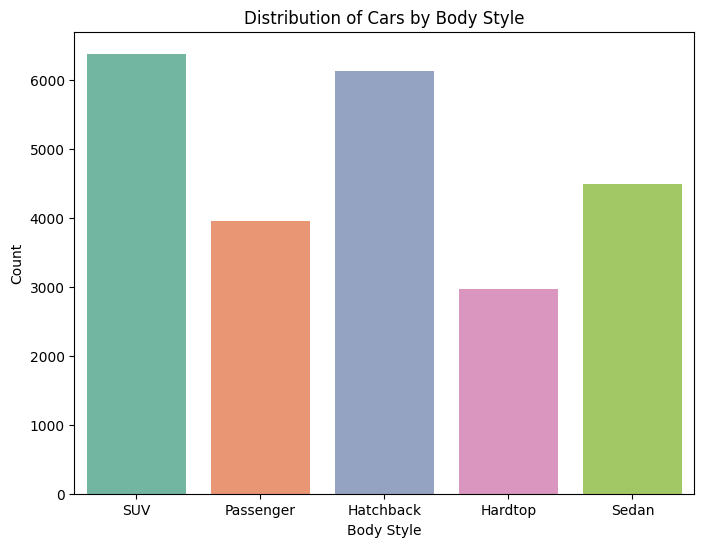

In [34]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Body Style', data=df2,palette='Set2')
plt.xlabel('Body Style')
plt.ylabel('Count')
plt.title('Distribution of Cars by Body Style')

**Q6.How does the average selling price of cars vary by customer gender and annual income?**

In [35]:
# average selling price of cars varying by customer gender
df2.groupby('Gender')['Price ($)'].mean()

,Price ($)
Gender,
Female,28277.265270
Male,28039.429407


In [36]:
# average selling price of cars varying by annual income
df2.groupby('Annual Income')['Price ($)'].mean()

,Price ($)
Annual Income,
10080,22801.000000
13500,27878.981415
24000,61001.000000
85000,43000.000000
106000,46001.000000
...,...
6600000,39000.000000
6800000,15000.000000
7650000,21000.000000


**Q7.What is the distribution of car prices by region, and how does the number of cars sold vary by region ?**

In [37]:
df2.groupby('Dealer_Region')['Price ($)'].value_counts()

Dealer_Region  Price ($)
Aurora         22000        155
               19000        127
               21000        122
               26000         96
               18000         81
                           ... 
Scottsdale     71210          1
               71580          1
               71990          1
               82500          1
               82750          1
Name: count, Length: 2447, dtype: int64

In [38]:
df2.groupby('Dealer_Region')['Car_id'].count()

,Car_id
Dealer_Region,
Aurora,3130
Austin,4135
Greenville,3128
Janesville,3821
Middletown,3128
Pasco,3131
Scottsdale,3433


**Q8.How does the average car price differ between cars with different engine sizes ?**

In [39]:
df2.groupby('Engine')['Price ($)'].mean()

,Price ($)
Engine,
DoubleÂ Overhead Camshaft,28248.525972
Overhead Camshaft,27914.710631


**Q9. How do car prices vary based on the customer’s annual income bracket ?**

In [40]:
df2.groupby('Annual Income')['Price ($)'].mean()

,Price ($)
Annual Income,
10080,22801.000000
13500,27878.981415
24000,61001.000000
85000,43000.000000
106000,46001.000000
...,...
6600000,39000.000000
6800000,15000.000000
7650000,21000.000000


**Q10.What are the top 5 car models with the highest number of sales, and how does their price distribution look ?**

In [41]:
top_5_models = df2['Model'].value_counts().nlargest(5).index

top_5_models_df = df2[df2['Model'].isin(top_5_models)]

price_distribution_top_models = top_5_models_df.groupby('Model')['Price ($)'].value_counts()

print(price_distribution_top_models)

Model       Price ($)
Diamante    21000        60
            19000        45
            18000        40
            49000        31
            17000        28
                         ..
Silhouette  34701         1
            39000         1
            60250         1
            60700         1
            60750         1
Name: count, Length: 278, dtype: int64


**Q11.How does car price vary with engine size across different car colors, and which colors have the highest price ?**


In [42]:
# Car price varying with engine size across different car colors
engine_price_color_variation = df2.groupby(['Color', 'Engine'])['Price ($)'].mean().unstack()
print(engine_price_color_variation)

average_price_by_color = df2.groupby('Color')['Price ($)'].mean()
print("\nAverage car price by color:")
print(average_price_by_color.sort_values(ascending=False))

Engine      DoubleÂ Overhead Camshaft  Overhead Camshaft
Color                                                   
Black                    25766.451103       31732.967164
Pale White               30347.987460       24327.767694
Red                      27434.392314       30153.405229

Average car price by color:
Color
Red           28736.319007
Black         28564.798015
Pale White    27483.890370
Name: Price ($), dtype: float64


In [43]:
# colors which have prizes
average_price_by_color = df2.groupby('Color')['Price ($)'].mean()
print("\nAverage car price by color:")
print(average_price_by_color.sort_values(ascending=False))


Average car price by color:
Color
Red           28736.319007
Black         28564.798015
Pale White    27483.890370
Name: Price ($), dtype: float64


**Q12.Is there any seasonal trend in car sales based on the date of sale ?**

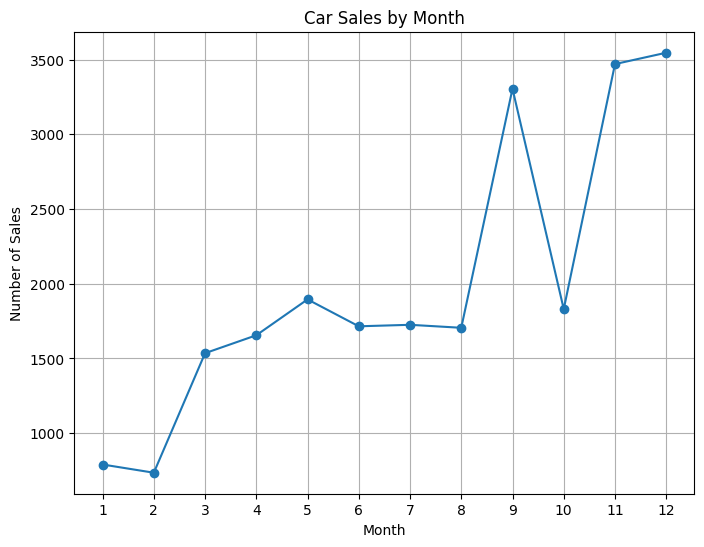

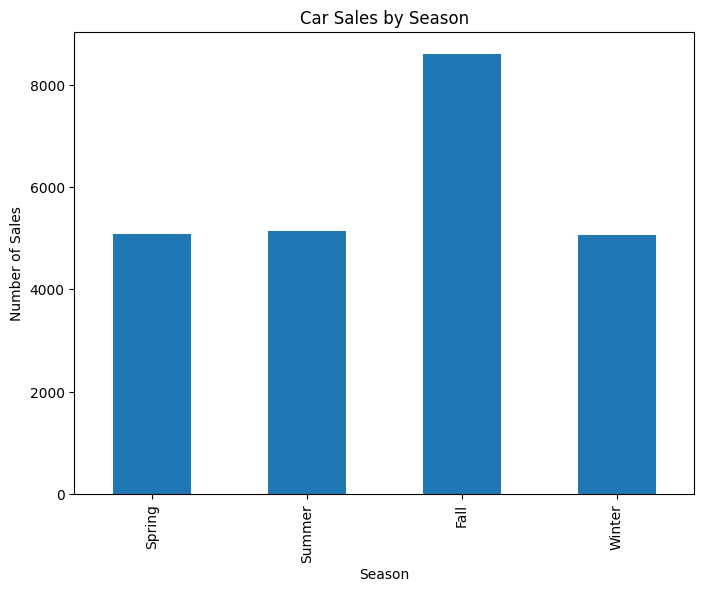

Car Sales by Month:
Month
1      790
2      735
3     1535
4     1655
5     1895
6     1715
7     1725
8     1705
9     3305
10    1830
11    3470
12    3546
dtype: int64

Car Sales by Season:


,0
Season,
Spring,5085
Summer,5145
Fall,8605
Winter,5071


In [44]:
df2['Date'] = pd.to_datetime(df2['Date'])

df2['Month'] = df2['Date'].dt.month
df2['Season'] = df2['Month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else 'Spring' if x in [3, 4, 5] else 'Summer' if x in [6, 7, 8] else 'Fall')

sales_by_month = df2.groupby('Month').size()
sales_by_season = df2.groupby('Season').size().reindex(['Spring', 'Summer', 'Fall', 'Winter'])

plt.figure(figsize=(8, 6))
sales_by_month.plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.title('Car Sales by Month')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
sales_by_season.plot(kind='bar')
plt.xlabel('Season')
plt.ylabel('Number of Sales')
plt.title('Car Sales by Season')
plt.show()

print("Car Sales by Month:")
print(sales_by_month)
print("\nCar Sales by Season:")
sales_by_season


**Q13.How does the car price distribution change when considering different combinations of body style and transmission type ?**


In [45]:
df2.groupby(['Body Style', 'Transmission'])['Price ($)'].count()

Body Style  Transmission
Hardtop     Auto            1408
            Manual          1563
Hatchback   Auto            3458
            Manual          2670
Passenger   Auto            2020
            Manual          1925
SUV         Auto            3086
            Manual          3288
Sedan       Auto            2599
            Manual          1889
Name: Price ($), dtype: int64

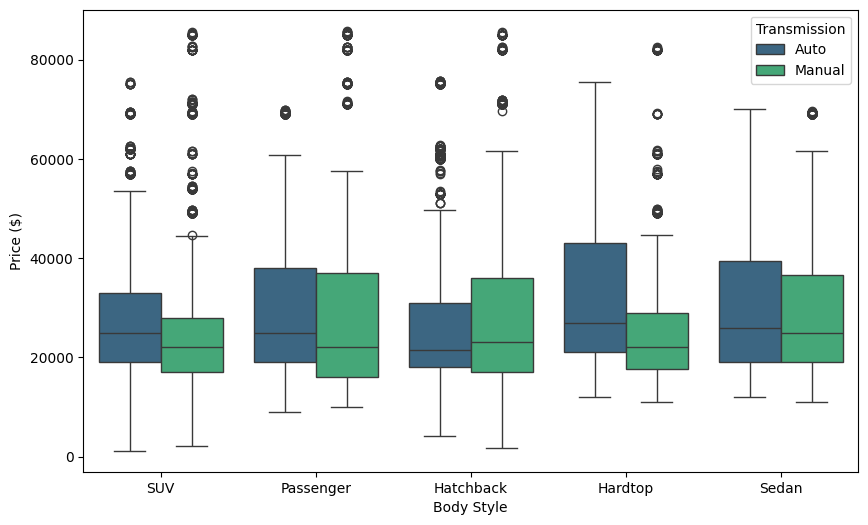

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df2,palette='viridis')
plt.xlabel('Body Style')
plt.ylabel('Price ($)')
plt.show()

**Q14.What is the correlation between car price, engine size, and annual income of customers, and how do these
features interact ?**

Correlation matrix between Car Price and Annual Income:
               Price ($)  Annual Income
Price ($)       1.000000       0.012065
Annual Income   0.012065       1.000000


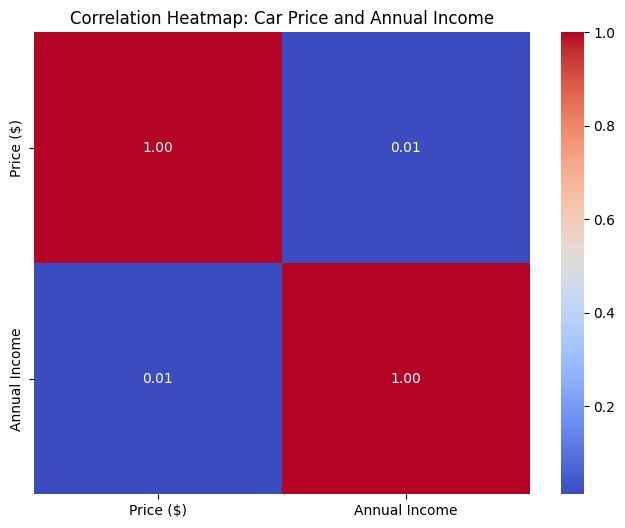

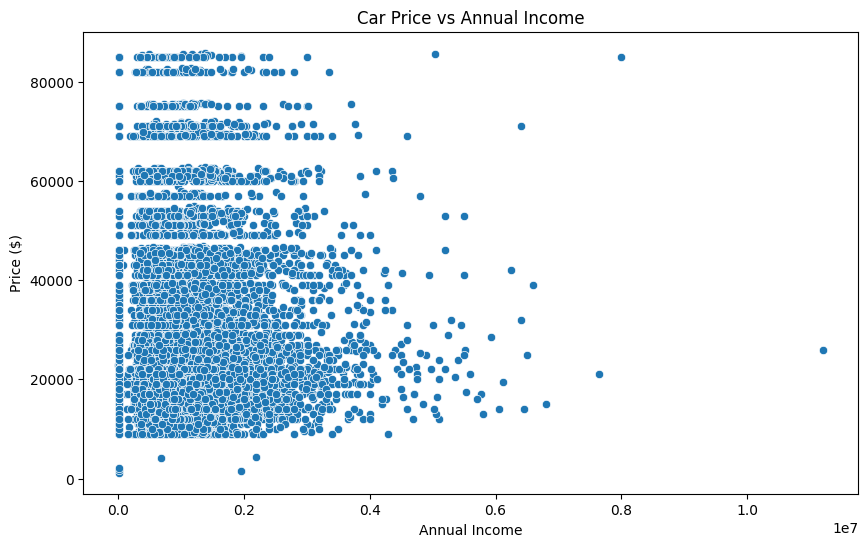

In [47]:
correlation_data = df2[['Price ($)', 'Annual Income']].dropna()

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

print("Correlation matrix between Car Price and Annual Income:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Car Price and Annual Income')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income', y='Price ($)', data=df2) # Using df2 here to include all data points
plt.xlabel('Annual Income')
plt.ylabel('Price ($)')
plt.title('Car Price vs Annual Income')
plt.show()

**Q15. How does the average car price vary across different car models and engine types ?**

In [48]:
average_price_by_model_engine = df2.groupby(['Model', 'Engine'])['Price ($)'].mean().unstack()
print(average_price_by_model_engine)


Engine    DoubleÂ Overhead Camshaft  Overhead Camshaft
Model                                                 
3-Sep                  37986.380117                NaN
3000GT                 22764.326923       21770.659864
300M                   21394.888889                NaN
323i                   16744.632287       21038.162162
328i                   21069.149606       38676.177215
...                             ...                ...
Viper                  32118.479167       26052.375000
Voyager                22066.026316       33995.678322
Windstar               25145.636364       17100.272727
Wrangler               21145.294737       18742.942029
Xterra                 15940.459459       31072.500000

[154 rows x 2 columns]


# EDA 3- Amazon Sales

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [50]:
pd.read_csv('amazon.csv')

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [51]:
df3=pd.read_csv('amazon.csv')

**Q1.What is the average rating for each product category ?**

In [52]:

df3['rating'] = pd.to_numeric(df3['rating'], errors='coerce')

# Calculate the average rating by category after converting the column
average_rating_by_category = df3.groupby('category')['rating'].mean()
average_rating_by_category

,rating
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,4.050000
...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",4.250000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",4.150000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",4.300000


**Q2.What are the top rating_count products by category ?**

In [61]:
df3.groupby('category')['rating_count'].max()

,rating_count
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,NaN
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,NaN
...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",NaN
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",NaN
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",NaN


**Q3.What is the distribution of discounted prices vs. actual price ?**

In [62]:
df3.groupby('discounted_price')['actual_price'].value_counts()

discounted_price  actual_price
₹1,043            ₹1,345          1
₹1,049            ₹2,499          2
                  ₹1,699          1
                  ₹1,950          1
                  ₹2,299          1
                                 ..
₹999              ₹2,490          1
                  ₹2,499          1
                  ₹2,600          1
                  ₹4,199          1
                  ₹4,499          1
Name: count, Length: 1105, dtype: int64

**Q4.How does the average discount percentage vary across categories ?**

In [72]:
df3.groupby('category')['discount_percentage'].mean()

,discount_percentage
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,42.0
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,78.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,35.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,56.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,46.5
...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",0.0
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",5.0
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",17.5


**Q5.What are the most popular product names ?**

In [80]:
df3['product_name'].value_counts().sort_values(ascending=False).head(1)

,count
product_name,
"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution",5


In [79]:
# Hence the most popular product in the provided data is >>Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution

**Q6.What are the most popular product keywords ?**

In [85]:
import collections
# Assuming the 'product_name' column contains keywords
all_keywords = ' '.join(df3['product_name']).split()

keyword_counts = collections.Counter(all_keywords)

most_popular_keywords = keyword_counts.most_common(1)
print("Most popular product keywords:", most_popular_keywords)

Most popular product keywords: [('with', 718)]


**Q7.What are the most popular product reviews ?**

In [86]:
df3['review_title'].sort_values(ascending=False).head(1)

,review_title
1179,"💥,Considering the price range, it’s a good one..."


**Q8.What is the correlation between discounted_price and rating ?**

In [101]:
df3['discounted_price'] = df3['discounted_price'].astype(str).str.replace('₹', '', regex=False).str.replace(',', '', regex=False)
df3['discounted_price'] = pd.to_numeric(df3['discounted_price'], errors='coerce')

df3['rating'] = pd.to_numeric(df3['rating'], errors='coerce')

selected_columns = df3[['discounted_price','rating']]

# Calculate the correlation matrix, dropping rows with NaN values that might result from coercion errors
correlation = selected_columns.dropna().corr()
print(correlation)

                  discounted_price    rating
discounted_price          1.000000  0.120337
rating                    0.120337  1.000000


**Q9. What are the Top 5 categories based on the highest ratings ?**

In [102]:
df3.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)

,rating
category,
Computers&Accessories|Tablets,4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters,4.5
Electronics|Cameras&Photography|Accessories|Film,4.5
Computers&Accessories|Components|Memory,4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients,4.5


**Q10. Identify any potential areas for improvement or optimization based on the data analysis ?**

Data Cleaning (Price and Rating):** The code handles the cleaning of `discounted_price` and `rating` for numerical conversion (Q8). Ensure that any non-numeric values are handled appropriately (errors='coerce' is used, which turns errors into NaN, so consider how NaNs are treated in subsequent analyses).
* Rating Analysis: Q1 and Q9 focus on average ratings. Exploring the distribution of ratings within categories (e.g., using histograms or box plots) would provide a more detailed understanding than just the average.
* Keyword Analysis: Q6 identifies the most popular keywords. More sophisticated text analysis techniques (like TF-IDF or topic modeling) could reveal underlying themes and popular product features mentioned in names or reviews.
*Review Analysis: Q7 identifies the most popular review title, but analyzing the content of reviews (e.g., sentiment analysis, identifying frequently mentioned pros and cons) could provide valuable insights into customer satisfaction and product strengths/weaknesses.
*Correlation Analysis:* The correlation in Q8 is calculated between `discounted_price` and `rating`. Exploring correlations with other numerical features (like `rating_count`) could reveal additional relationships.
*Price Analysis: Q3 examines the distribution of discounted vs. actual prices. Calculating the actual discount amount and analyzing its distribution could be insightful.
*Discount Analysis: Q4 looks at average discount percentage by category. Examining the distribution of discount percentages within categories (e.g., using box plots) could reveal variation in discounting strategies.



# EDA 4-Spotify Data

In [103]:
pd.read_csv('spotify.csv')

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [104]:
df4=pd.read_csv('spotify.csv')

**Q1.Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
the needful ?**

In [105]:
df4.isnull().sum() # There are no null values in the given dataframe

,0
Artist,0
Track Name,0
Popularity,0
Duration (ms),0
Track ID,0


In [107]:
df4.duplicated().sum()

np.int64(27)

In [108]:
# dropping duplicated values for the given data set
df4.drop_duplicates(inplace=True)

**Q2.What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram ?**

In [111]:
df4['Popularity'].value_counts()

,count
Popularity,
76,23
79,21
84,19
78,18
82,18
71,18
77,16
75,16
81,16


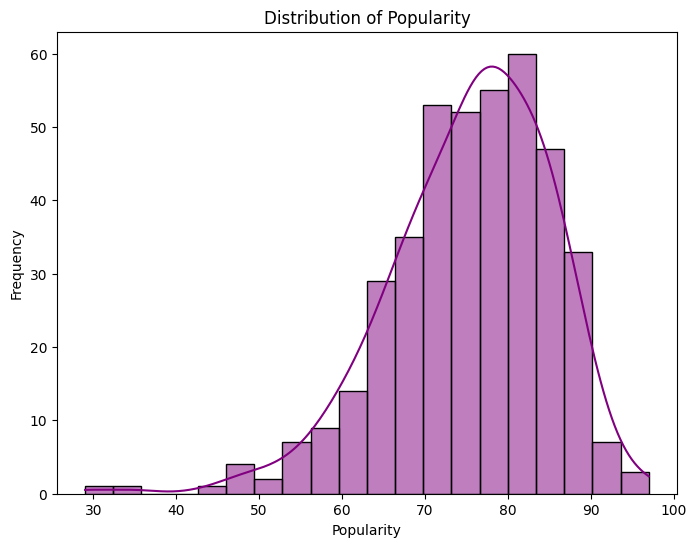

In [114]:
plt.figure(figsize=(8, 6))
sns.histplot(df4['Popularity'], bins=20, kde=True,color='purple')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Distribution of Popularity')
plt.show()

**Q3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot ?**

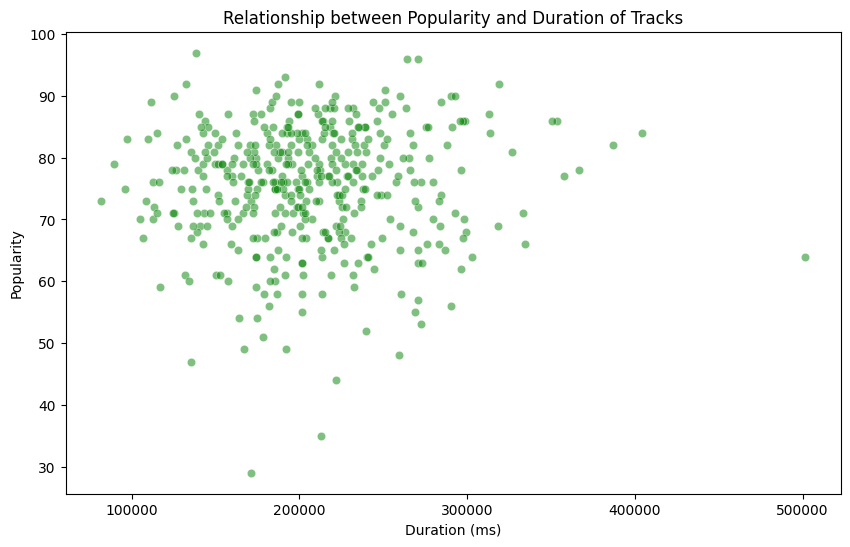

In [122]:
# scatter plot decribing the relationship between popularity and duartion of tracks
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration (ms)', y='Popularity', data=df4, alpha=0.5,color='green')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.title('Relationship between Popularity and Duration of Tracks')
plt.show()

**Q4.Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
a countplot?**

In [129]:
artist_track_counts = df4['Artist'].value_counts()

# Sort the counts in descending order and get the top 1
highest_track_artist = artist_track_counts.sort_values(ascending=False).head(1)

print(highest_track_artist)

Artist
Drake    17
Name: count, dtype: int64


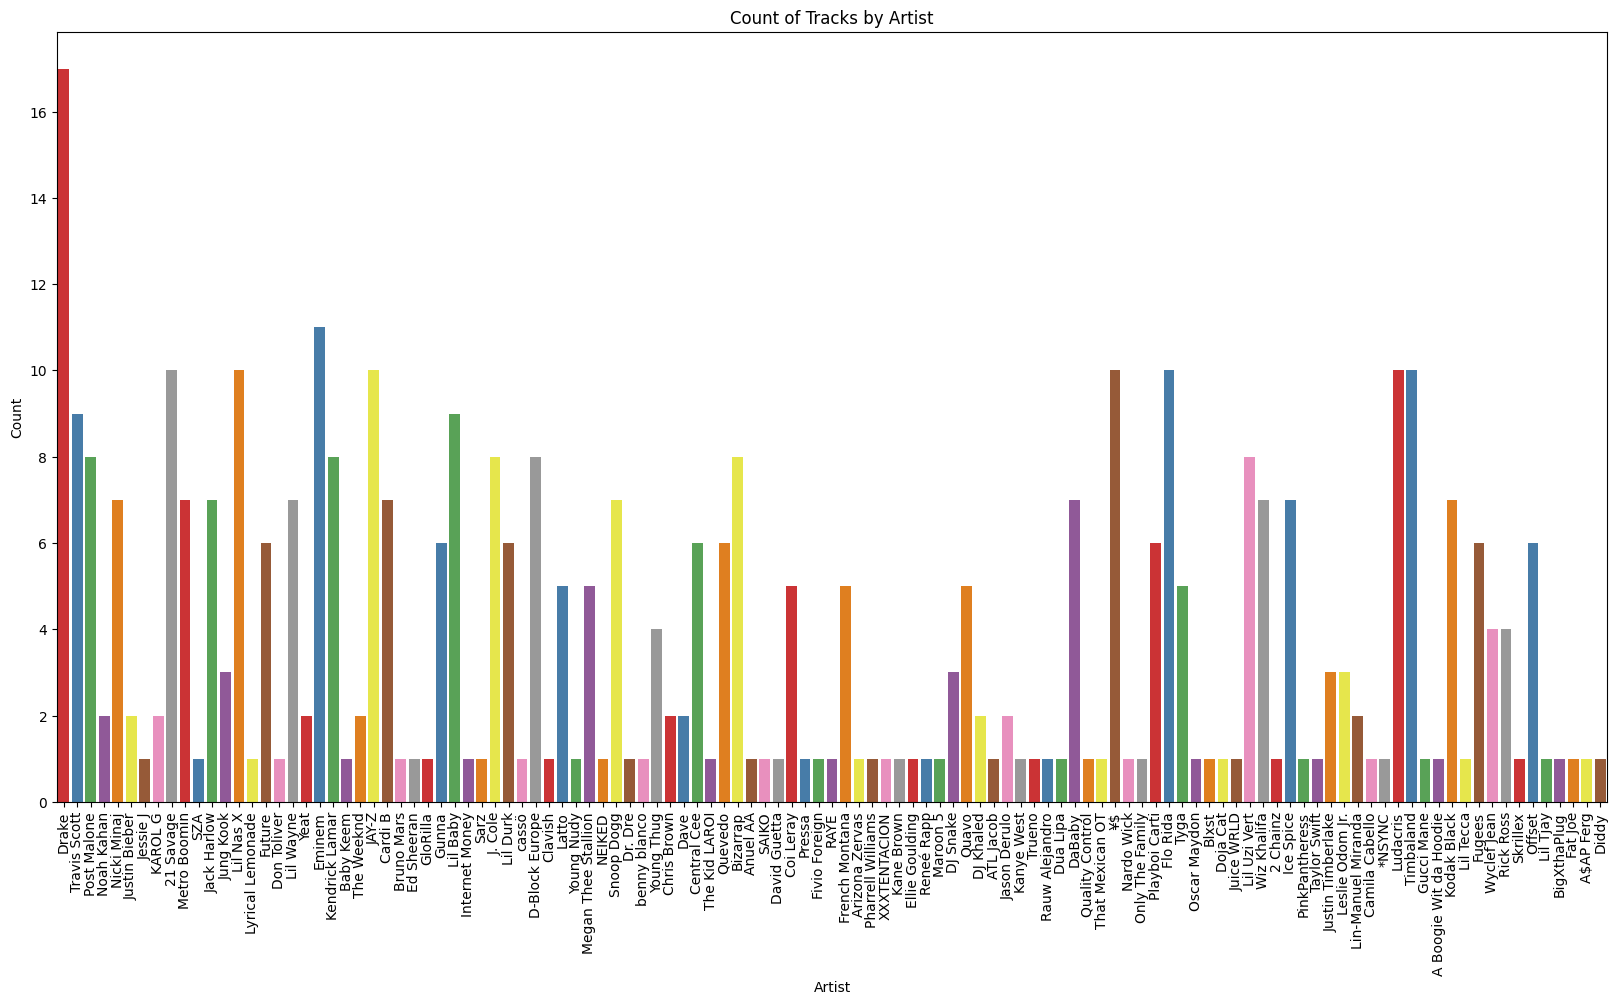

In [171]:
plt.figure(figsize=(20,10))
sns.countplot(x='Artist',data=df4,palette='Set1')
plt.xlabel('Artist')
plt.ylabel('Count')
plt.title('Count of Tracks by Artist')
plt.xticks(rotation=90)
plt.show()

**Q5.What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each ?**

In [149]:
least_popular_tracks = df4.sort_values(by='Popularity', ascending=True).head(5)

print("Top 5 Least Popular Tracks:")
for index, row in least_popular_tracks.iterrows():
    print(f"Track Name: {row['Track Name']}, Artist: {row['Artist']}")


Top 5 Least Popular Tracks:
Track Name: Attachments (feat. Coi Leray), Artist: Pressa
Track Name: Intentions, Artist: Justin Bieber
Track Name: Splash Brothers, Artist: French Montana
Track Name: On Me - Remix, Artist: Lil Baby
Track Name: 911 (feat. Mary J. Blige), Artist: Wyclef Jean


**Q6.Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
display the average popularity for each artist ?**

In [151]:
top_artists = df4.groupby('Artist')['Popularity'].sum().sort_values(ascending=False).head(5).index

# Filter the DataFrame to include only tracks by these top artists
df_top_artists = df4[df4['Artist'].isin(top_artists)]

# Calculate the average popularity for each of these top artists
average_popularity_by_artist = df_top_artists.groupby('Artist')['Popularity'].mean()

# Find the artist with the highest average popularity among the top 5
artist_highest_avg_popularity = average_popularity_by_artist.idxmax()
highest_avg_popularity_value = average_popularity_by_artist.max()

print("Average Popularity for the Top 5 Most Popular Artists:")
print(average_popularity_by_artist)

print(f"\nAmong the top 5 most popular artists, '{artist_highest_avg_popularity}' has the highest average popularity ({highest_avg_popularity_value:.2f}).")

Average Popularity for the Top 5 Most Popular Artists:
Artist
21 Savage    83.800000
Drake        82.882353
Eminem       83.636364
Flo Rida     78.000000
¥$           85.100000
Name: Popularity, dtype: float64

Among the top 5 most popular artists, '¥$' has the highest average popularity (85.10).


**Q7.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist ?**

In [153]:
top_artists = df4.groupby('Artist')['Popularity'].sum().sort_values(ascending=False).head(5).index

print("Most Popular Track for Each of the Top 5 Most Popular Artists:")
for artist in top_artists:

    artist_tracks = df4[df4['Artist'] == artist]


    most_popular_track = artist_tracks.sort_values(by='Popularity', ascending=False).iloc[0]

    print(f"Artist: {artist}, Most Popular Track: {most_popular_track['Track Name']}")

Most Popular Track for Each of the Top 5 Most Popular Artists:
Artist: Drake, Most Popular Track: Rich Baby Daddy (feat. Sexyy Red & SZA)
Artist: Eminem, Most Popular Track: Without Me
Artist: ¥$, Most Popular Track: CARNIVAL
Artist: 21 Savage, Most Popular Track: redrum
Artist: Flo Rida, Most Popular Track: Low (feat. T-Pain)


**Q8.Visualize relationships between multiple numerical variables simultaneously using a pair plot ?**

<Figure size 1000x800 with 0 Axes>

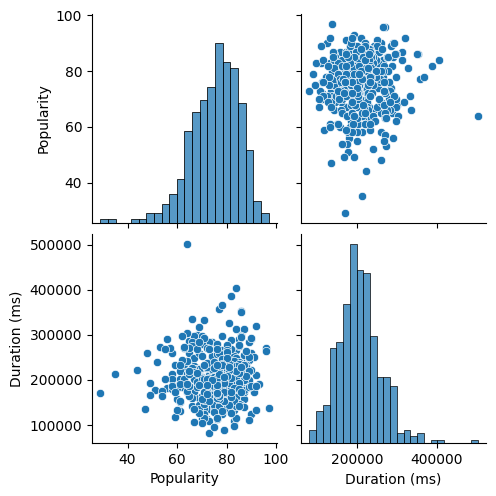

In [162]:
plt.figure(figsize=(10, 8))
sns.pairplot(df4)

**Q9.Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or
violin plot ?**

<Axes: xlabel='Artist', ylabel='Duration (ms)'>

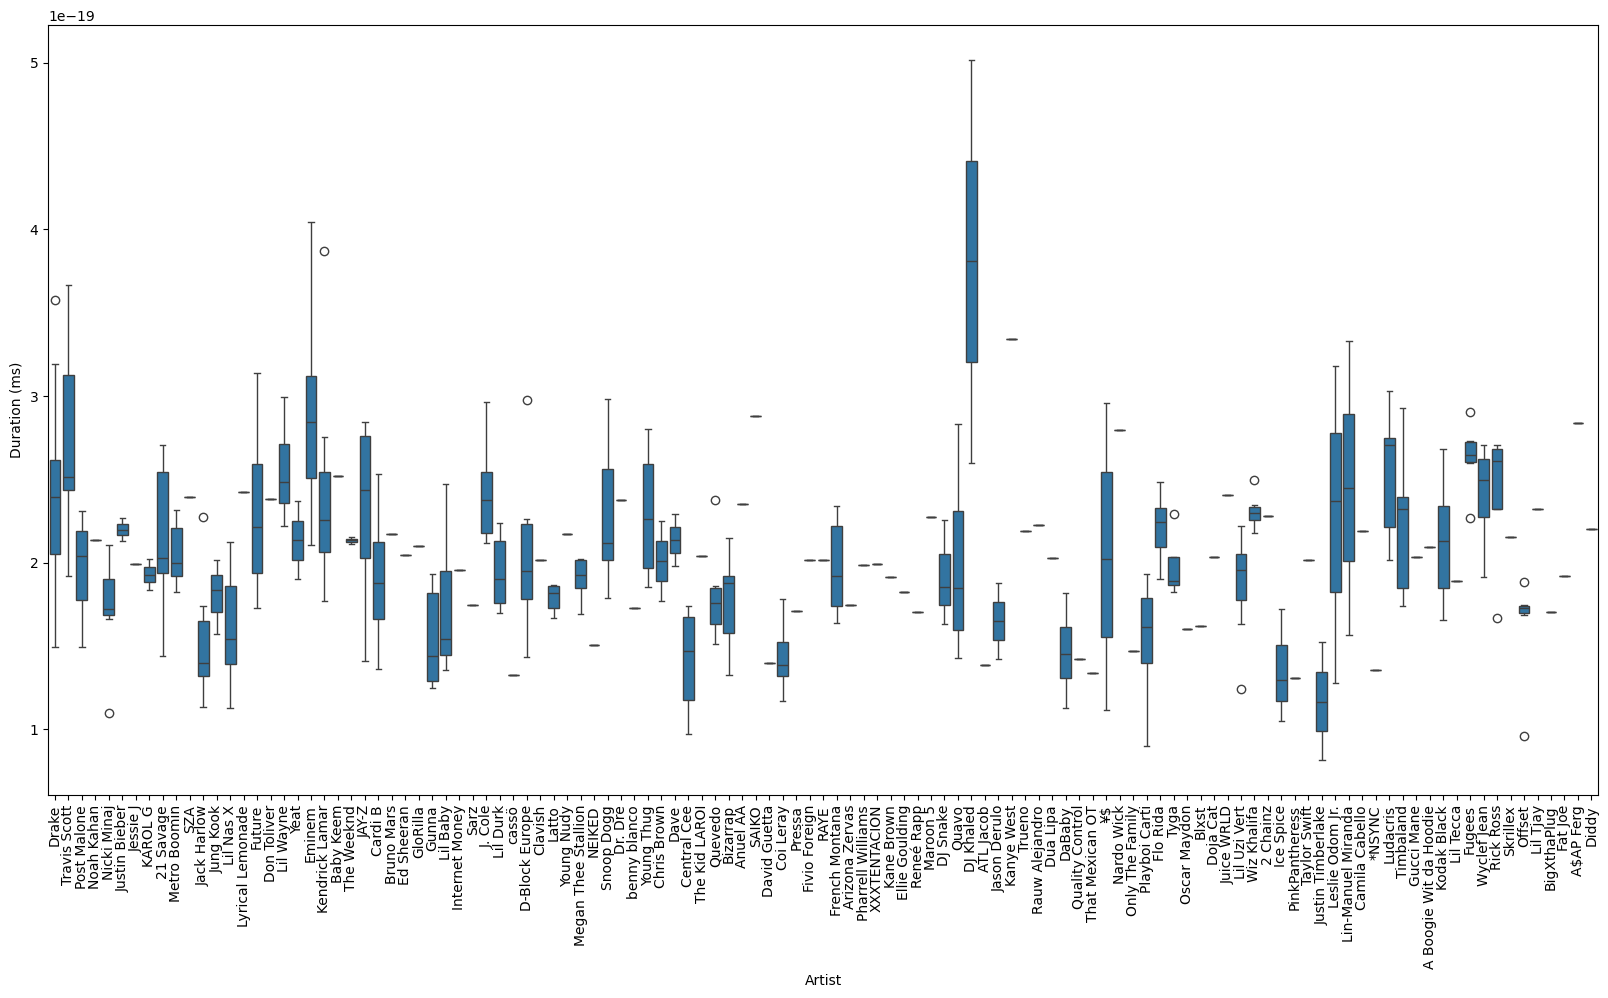

In [170]:
df4['Duration (ms)'] = df4['Duration (ms)'].apply(lambda x: x / 1000)

plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.boxplot(x='Artist', y='Duration (ms)', data=df4)

**Q10.How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
violin plot.**

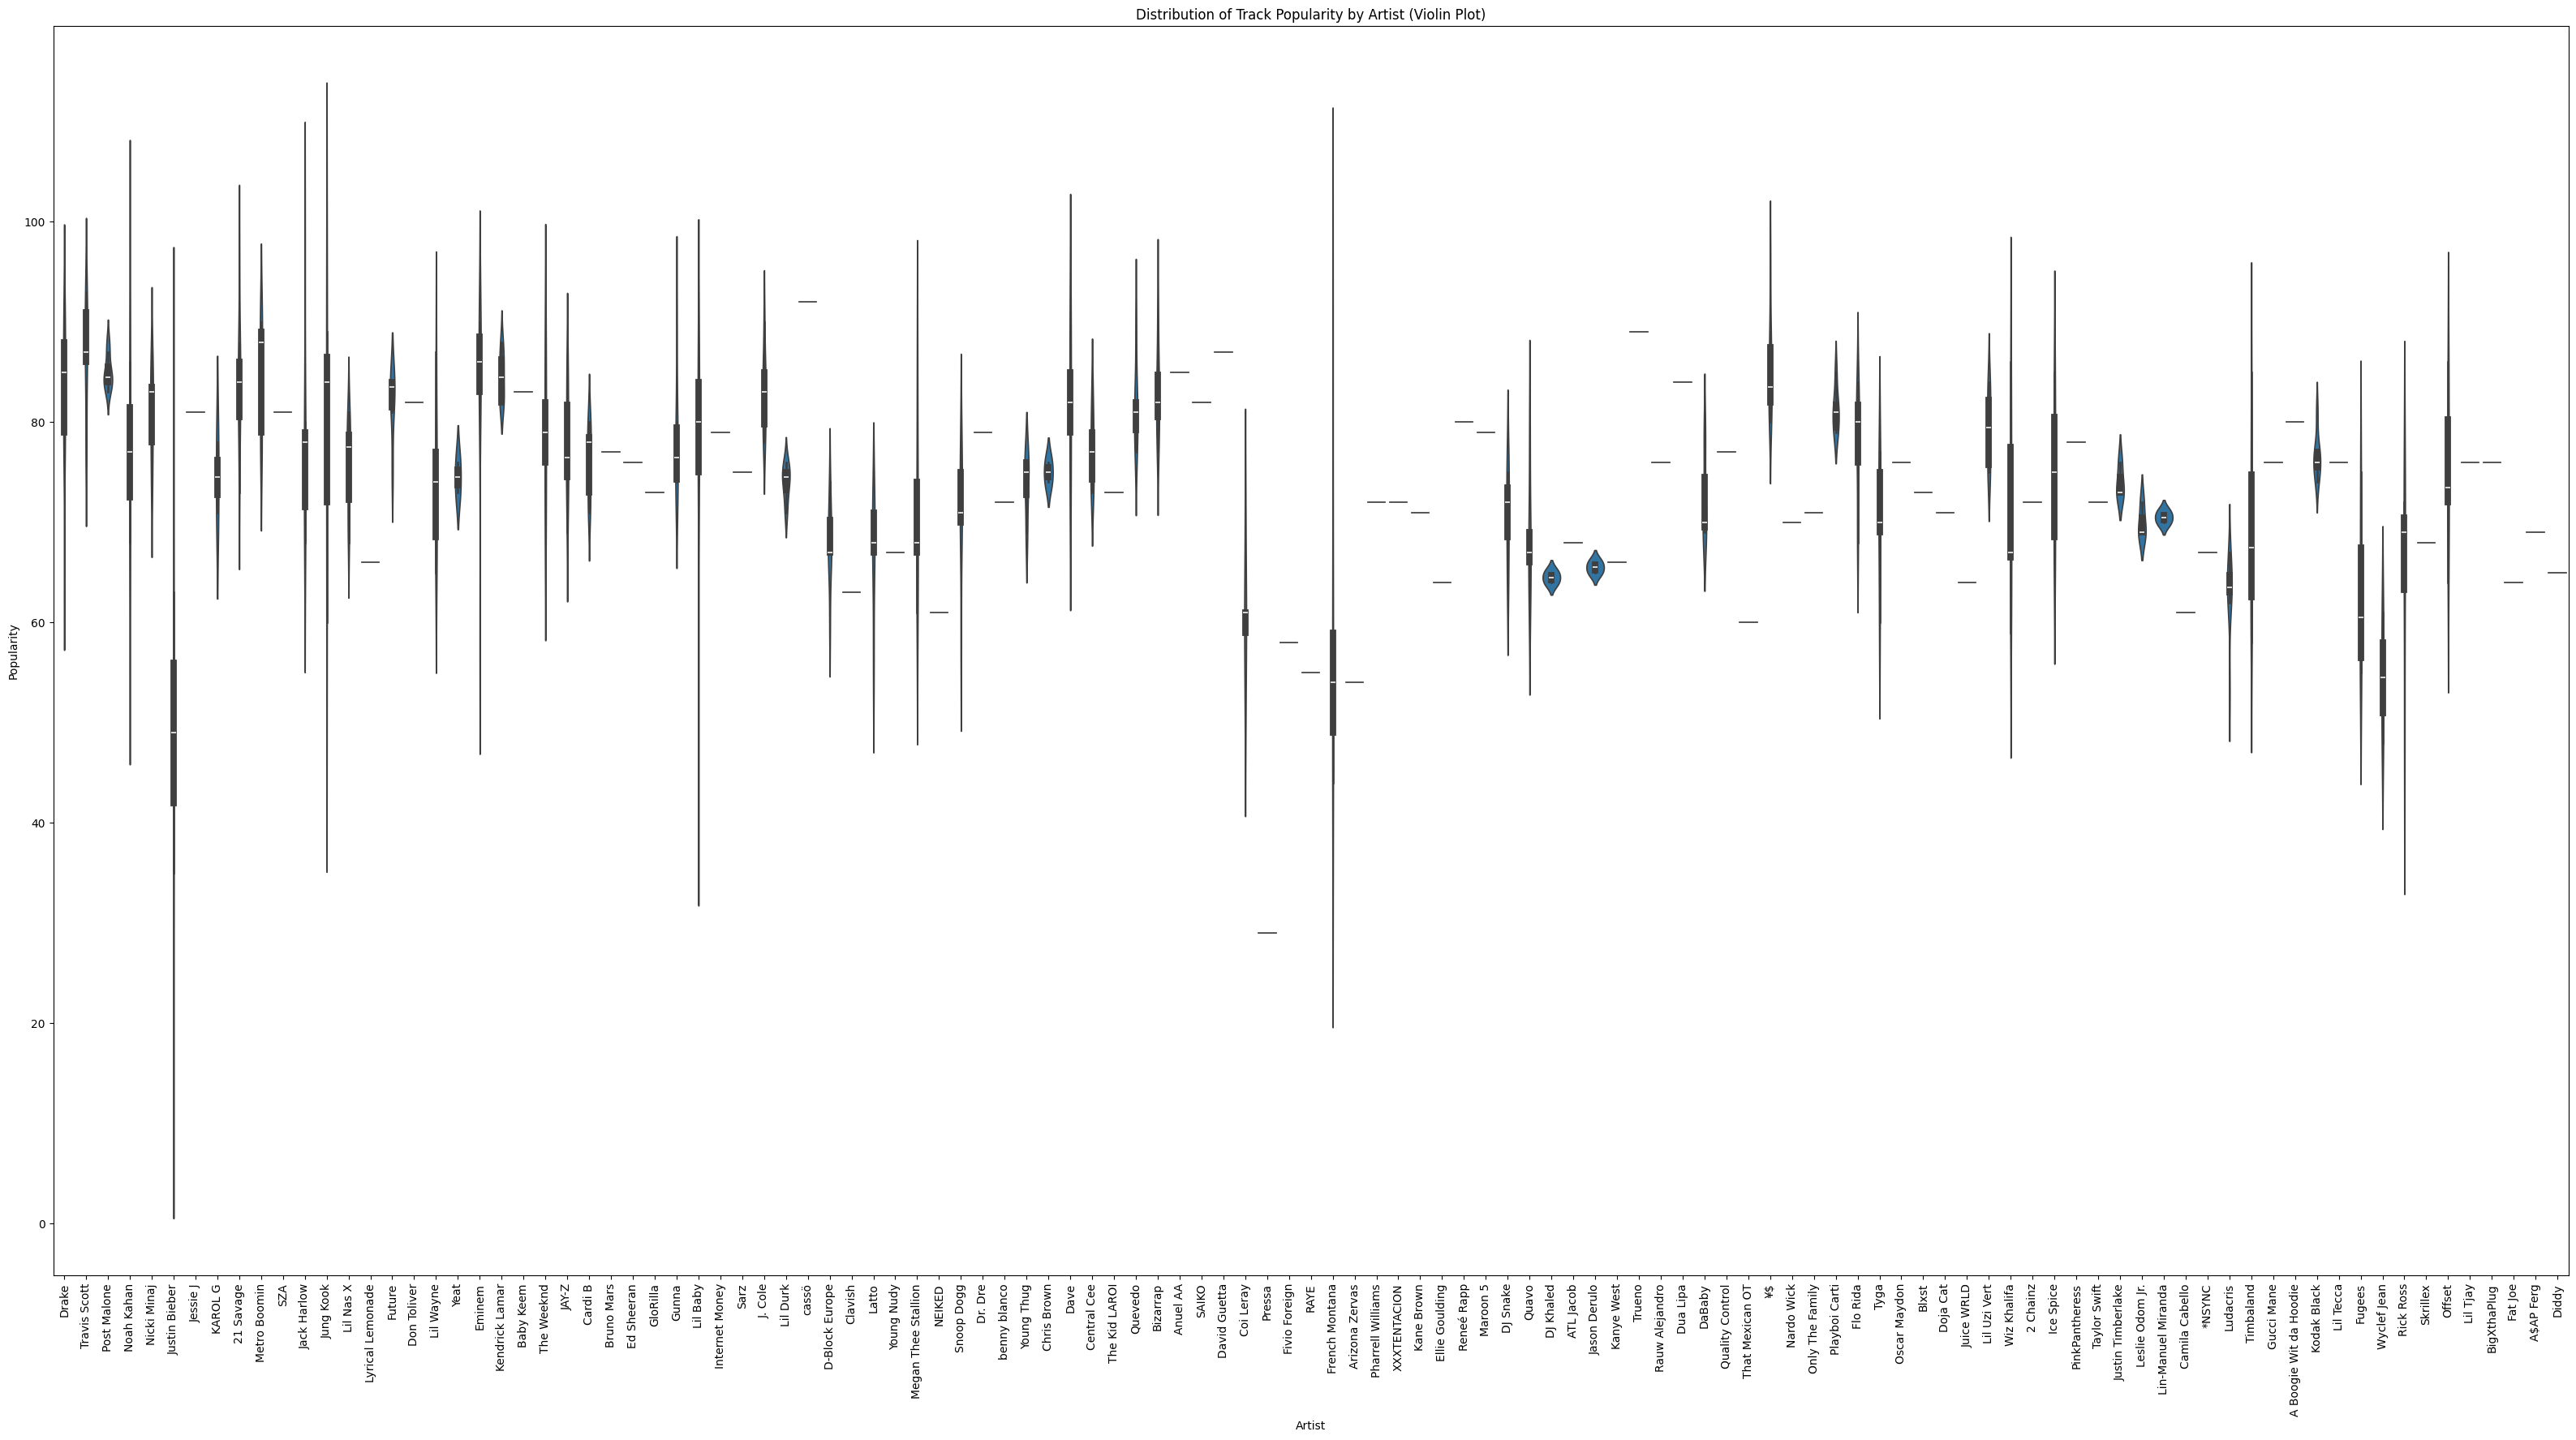

In [175]:
# violin plot

plt.figure(figsize=(40,20))
plt.xticks(rotation=90)
sns.violinplot(x='Artist', y='Popularity', data=df4)
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.title('Distribution of Track Popularity by Artist (Violin Plot)')
plt.show()